<a href="https://colab.research.google.com/github/Al-x-R/Colab-examples/blob/master/PlayBoy_StandardScaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#https://raw.githubusercontent.com/an-2-an/data/master/girls.csv
df = pd.read_csv('https://raw.githubusercontent.com/an-2-an/data/master/girls.csv')
df

,Month,Year,Bust,Waist,Hips,Height,Weight
0,December,1953,91,61,91,165,54
1,March,1954,86,61,89,168,54
2,July,1955,91,61,91,166,52
3,December,1955,91,61,91,166,52
4,July,1956,91,61,86,157,48
...,...,...,...,...,...,...,...
599,September,2008,86,64,91,170,52
600,October,2008,86,61,86,165,52
601,November,2008,86,53,81,168,49
602,December,2008,86,64,89,173,52


In [0]:
df['new'] = (df.Year // 10).astype(int)
df

,Month,Year,Bust,Waist,Hips,Height,Weight,new
0,December,1953,91,61,91,165,54,195
1,March,1954,86,61,89,168,54,195
2,July,1955,91,61,91,166,52,195
3,December,1955,91,61,91,166,52,195
4,July,1956,91,61,86,157,48,195
...,...,...,...,...,...,...,...,...
599,September,2008,86,64,91,170,52,200
600,October,2008,86,61,86,165,52,200
601,November,2008,86,53,81,168,49,200
602,December,2008,86,64,89,173,52,200


In [0]:
df.new.drop_duplicates()


0      195
24     196
141    197
259    198
376    199
496    200
Name: new, dtype: int64

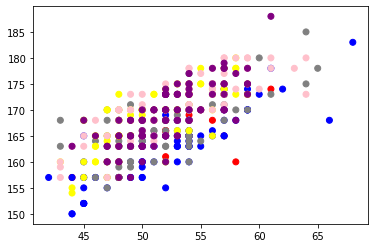

In [0]:
plt.scatter(x=df.Weight, y=df.Height, c=df.new.map({195:'red', 196:'blue', 197:'grey', 198:'yellow', 199: 'pink', 200:'purple'}));

In [0]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

X = df.drop(['Month'], axis=1)


In [0]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]

array([[-2.02663623,  0.42773253,  0.40681624,  0.87966554, -0.50025187,
         0.45355897, -1.91547043],
       [-1.95921193, -0.82517944,  0.40681624,  0.30433475,  0.01950523,
         0.45355897, -1.91547043],
       [-1.89178762,  0.42773253,  0.40681624,  0.87966554, -0.3269995 ,
        -0.04182913, -1.91547043]])

In [0]:
%%time
tsne = TSNE(random_state=7)
tsne_repr =tsne.fit_transform(X_scaled)

CPU times: user 3.45 s, sys: 16.2 ms, total: 3.46 s
Wall time: 3.5 s


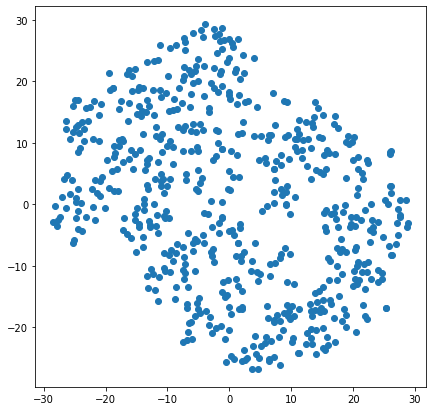

In [0]:
plt.figure(figsize=(7, 7))
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1]);

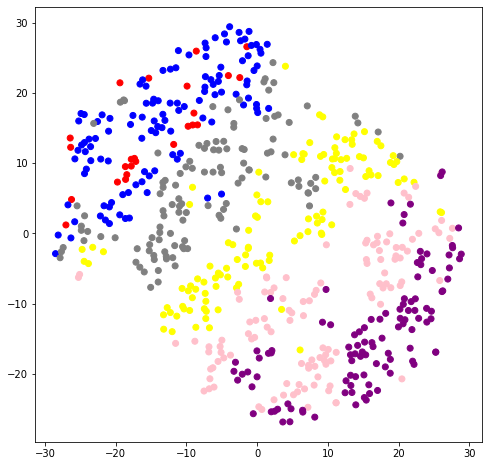

In [0]:
plt.figure(figsize=(8,8))
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df.new.map({195:'red', 196:'blue', 197:'grey', 198:'yellow', 199: 'pink', 200:'purple'}));